### Culmen length refers to the length of the upper mandible (the top part of the beak) from the base where it meets the face to the tip of the beak.
### Culmen depth refers to the height of the beak at the base, often taken at the point where the beak meets the face (near the base of the culmen)
### Delta 15 N (δ¹⁵N) refers to the nitrogen stable isotope ratio, which is a measure of the ratio between the heavy isotope 15N and the lighter isotope 14𝑁The unit o/oo stands for per mille (‰), which is similar to parts per thousand.δ¹⁵N is used in ecological and biological studies to understand the diet and trophic level of organisms. Higher δ¹⁵N values typically indicate a higher position in the food chain, as nitrogen isotopes become more concentrated in organisms at higher trophic levels
### Delta 13 C (δ¹³C) in the penguin dataset refers to the carbon stable isotope ratio, which measures the ratio of the heavy carbon isotope 13C to the lighter isotope 12𝐶Like δ¹⁵N, it is expressed in per mille (‰), denoted by o/oo.δ¹³C values provide information about the primary sources of carbon in an organism's diet.

In [22]:
import pandas as pd
penguin_raw = pd.read_csv('penguins_raw.csv')
penguin_raw.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [24]:
#function to do data cleaning
def wrangle (penguin_raw):
    #delete the non informative columns,delete stage&region bse of low ordinality
    penguin_raw.drop(columns =['Comments','studyName','Sample Number','Individual ID','Stage','Region'], inplace = True)
    #change date dtype
    penguin_raw['Date Egg']= pd.to_datetime(penguin_raw['Date Egg'])
    #penguin_raw['year'] = penguin_raw['Date Egg'].dt.year
    #penguin_raw['month'] = penguin_raw['Date Egg'].dt.month
    #penguin_raw['day'] = penguin_raw['Date Egg'].dt.day
    #penguin_raw.drop(columns ='Date Egg', inplace = True)
    #handle missing values
    # Fill missing values with the mean
    penguin_raw['Body Mass (g)'] = penguin_raw['Body Mass (g)'].fillna(penguin_raw['Body Mass (g)'].mean())
    penguin_raw['Culmen Length (mm)'] = penguin_raw['Culmen Length (mm)'].fillna(penguin_raw['Culmen Length (mm)'].mean())
    penguin_raw['Culmen Depth (mm)'] = penguin_raw['Culmen Depth (mm)'].fillna(penguin_raw['Culmen Depth (mm)'].mean())
    penguin_raw['Flipper Length (mm)'] = penguin_raw['Flipper Length (mm)'].fillna(penguin_raw['Flipper Length (mm)'].mean())
    penguin_raw['Delta 15 N (o/oo)'] = penguin_raw['Delta 15 N (o/oo)'].fillna(penguin_raw['Delta 15 N (o/oo)'].mean())
    penguin_raw['Delta 13 C (o/oo)'] = penguin_raw['Delta 13 C (o/oo)'].fillna(penguin_raw['Delta 13 C (o/oo)'].mean())
    #fill missing values 
    #we are using mode because the proportin of male is close to female
    mode_value = penguin_raw['Sex'].mode()[0]
    penguin_raw['Sex'].fillna(mode_value, inplace=True)
    
    return penguin_raw

In [26]:
#using the wrangle function
df = wrangle(penguin_raw)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Species              344 non-null    object        
 1   Island               344 non-null    object        
 2   Clutch Completion    344 non-null    object        
 3   Date Egg             344 non-null    datetime64[ns]
 4   Culmen Length (mm)   344 non-null    float64       
 5   Culmen Depth (mm)    344 non-null    float64       
 6   Flipper Length (mm)  344 non-null    float64       
 7   Body Mass (g)        344 non-null    float64       
 8   Sex                  344 non-null    object        
 9   Delta 15 N (o/oo)    344 non-null    float64       
 10  Delta 13 C (o/oo)    344 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 29.7+ KB


## categorical features

In [10]:
# understanding categorical features
categorical_df = df.select_dtypes('object')
for col in categorical_df.columns:
    category_counts = {col:categorical_df[col].nunique()}
    print(category_counts)

{'Species': 3}
{'Island': 3}
{'Clutch Completion': 2}
{'Sex': 2}


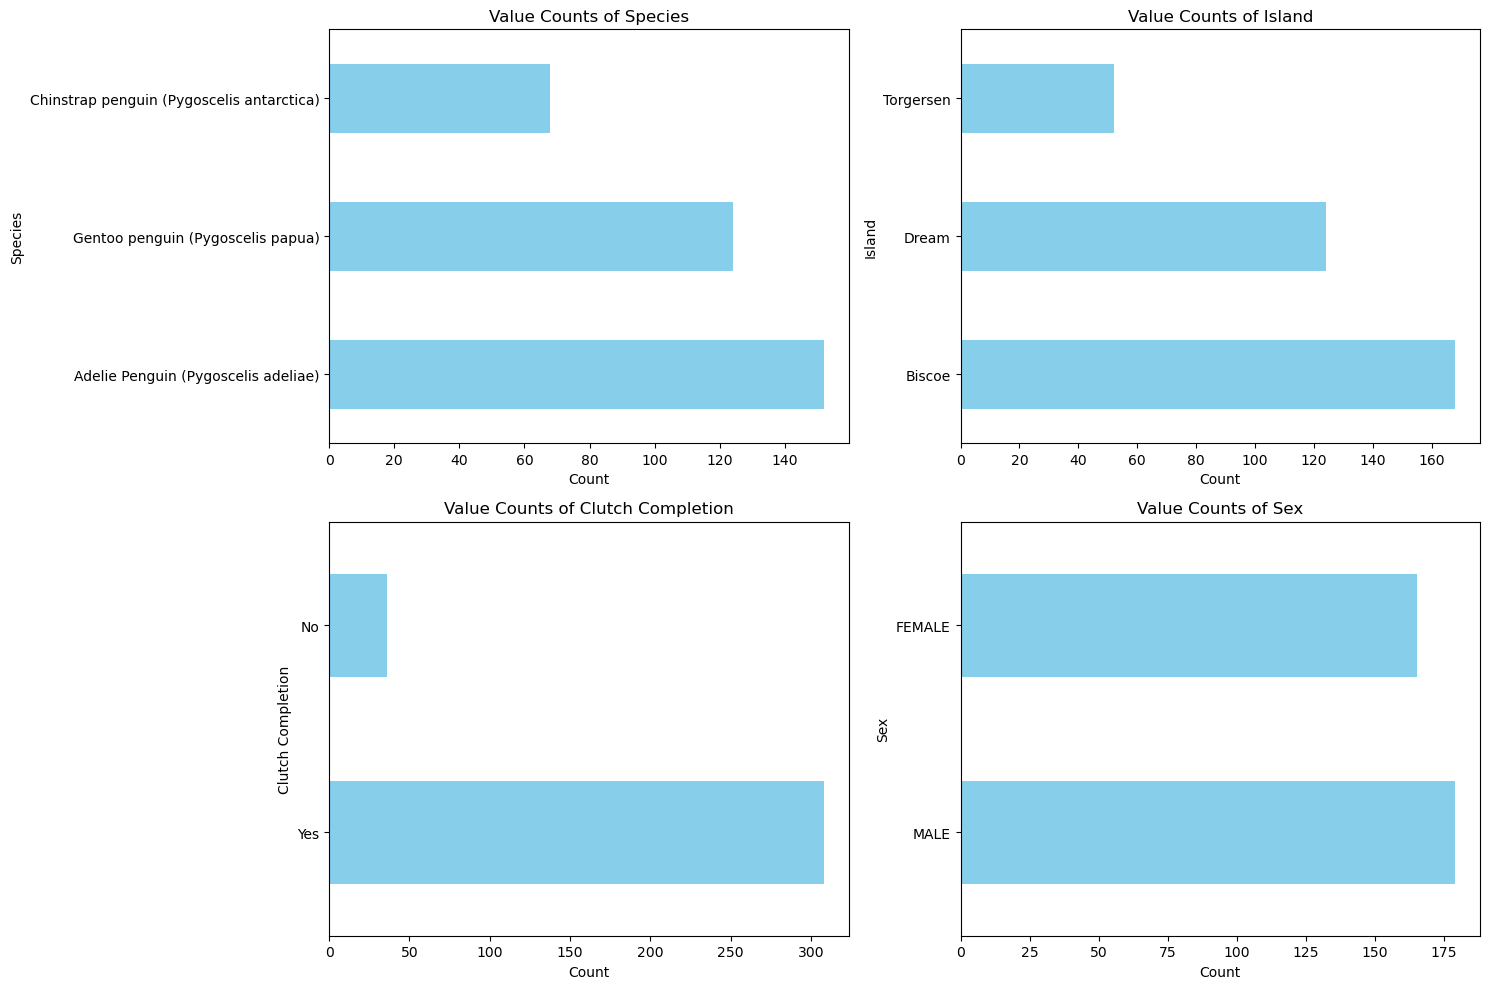

In [16]:
#plot valuecounts for each categorical feature to see how imbalanced they are
import matplotlib.pyplot as plt
import seaborn as sns
# Loop through each categorical column and plot value counts
# Create a figure and axes for a 2x3 grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array to make it easier to iterate

# Iterate over each categorical feature and corresponding axis
for i, col in enumerate(categorical_df.columns):
    categorical_df[col].value_counts().plot(kind='barh', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Value Counts of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

    

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = categorical_df.apply(encoder.fit_transform)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


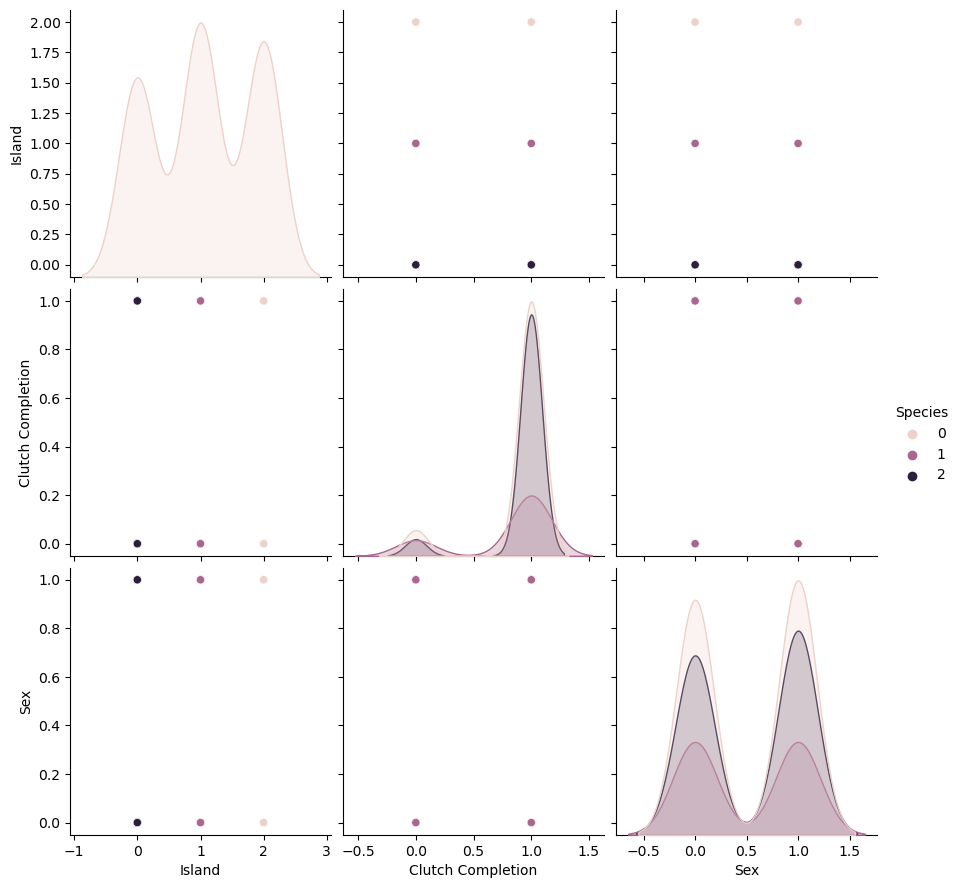

In [79]:

sns.pairplot(encoded_labels, hue="Species", height=3,diag_kind="kde",);

## numerical features

In [32]:
numerical_df = df.select_dtypes('float64')
numerical_df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.443643,1.969027,14.020657,799.613058,0.540392,0.778770
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460
50%,44.250000,17.300000,197.000000,4050.000000,8.687455,-25.793660
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


Culmen Length (mm)     0.053272
Culmen Depth (mm)     -0.143880
Flipper Length (mm)    0.346682
Body Mass (g)          0.471690
Delta 15 N (o/oo)      0.243952
Delta 13 C (o/oo)      0.344291
dtype: float64


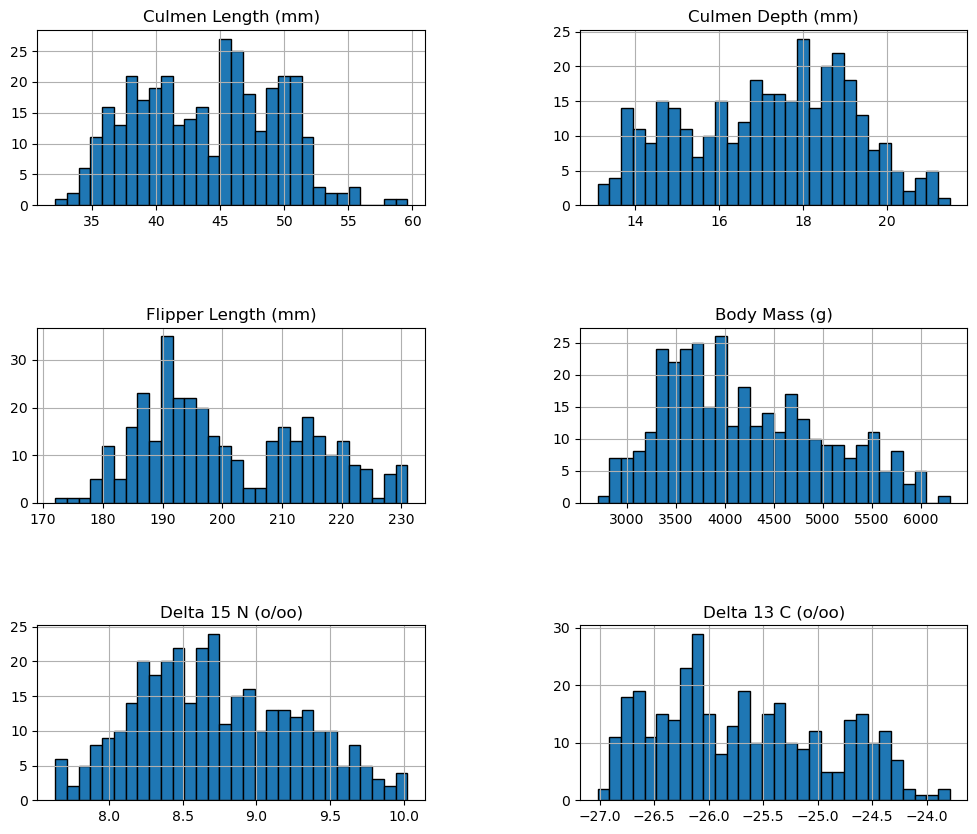

In [36]:
print(numerical_df.skew())
#create histograms to understand data distribution
numerical_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

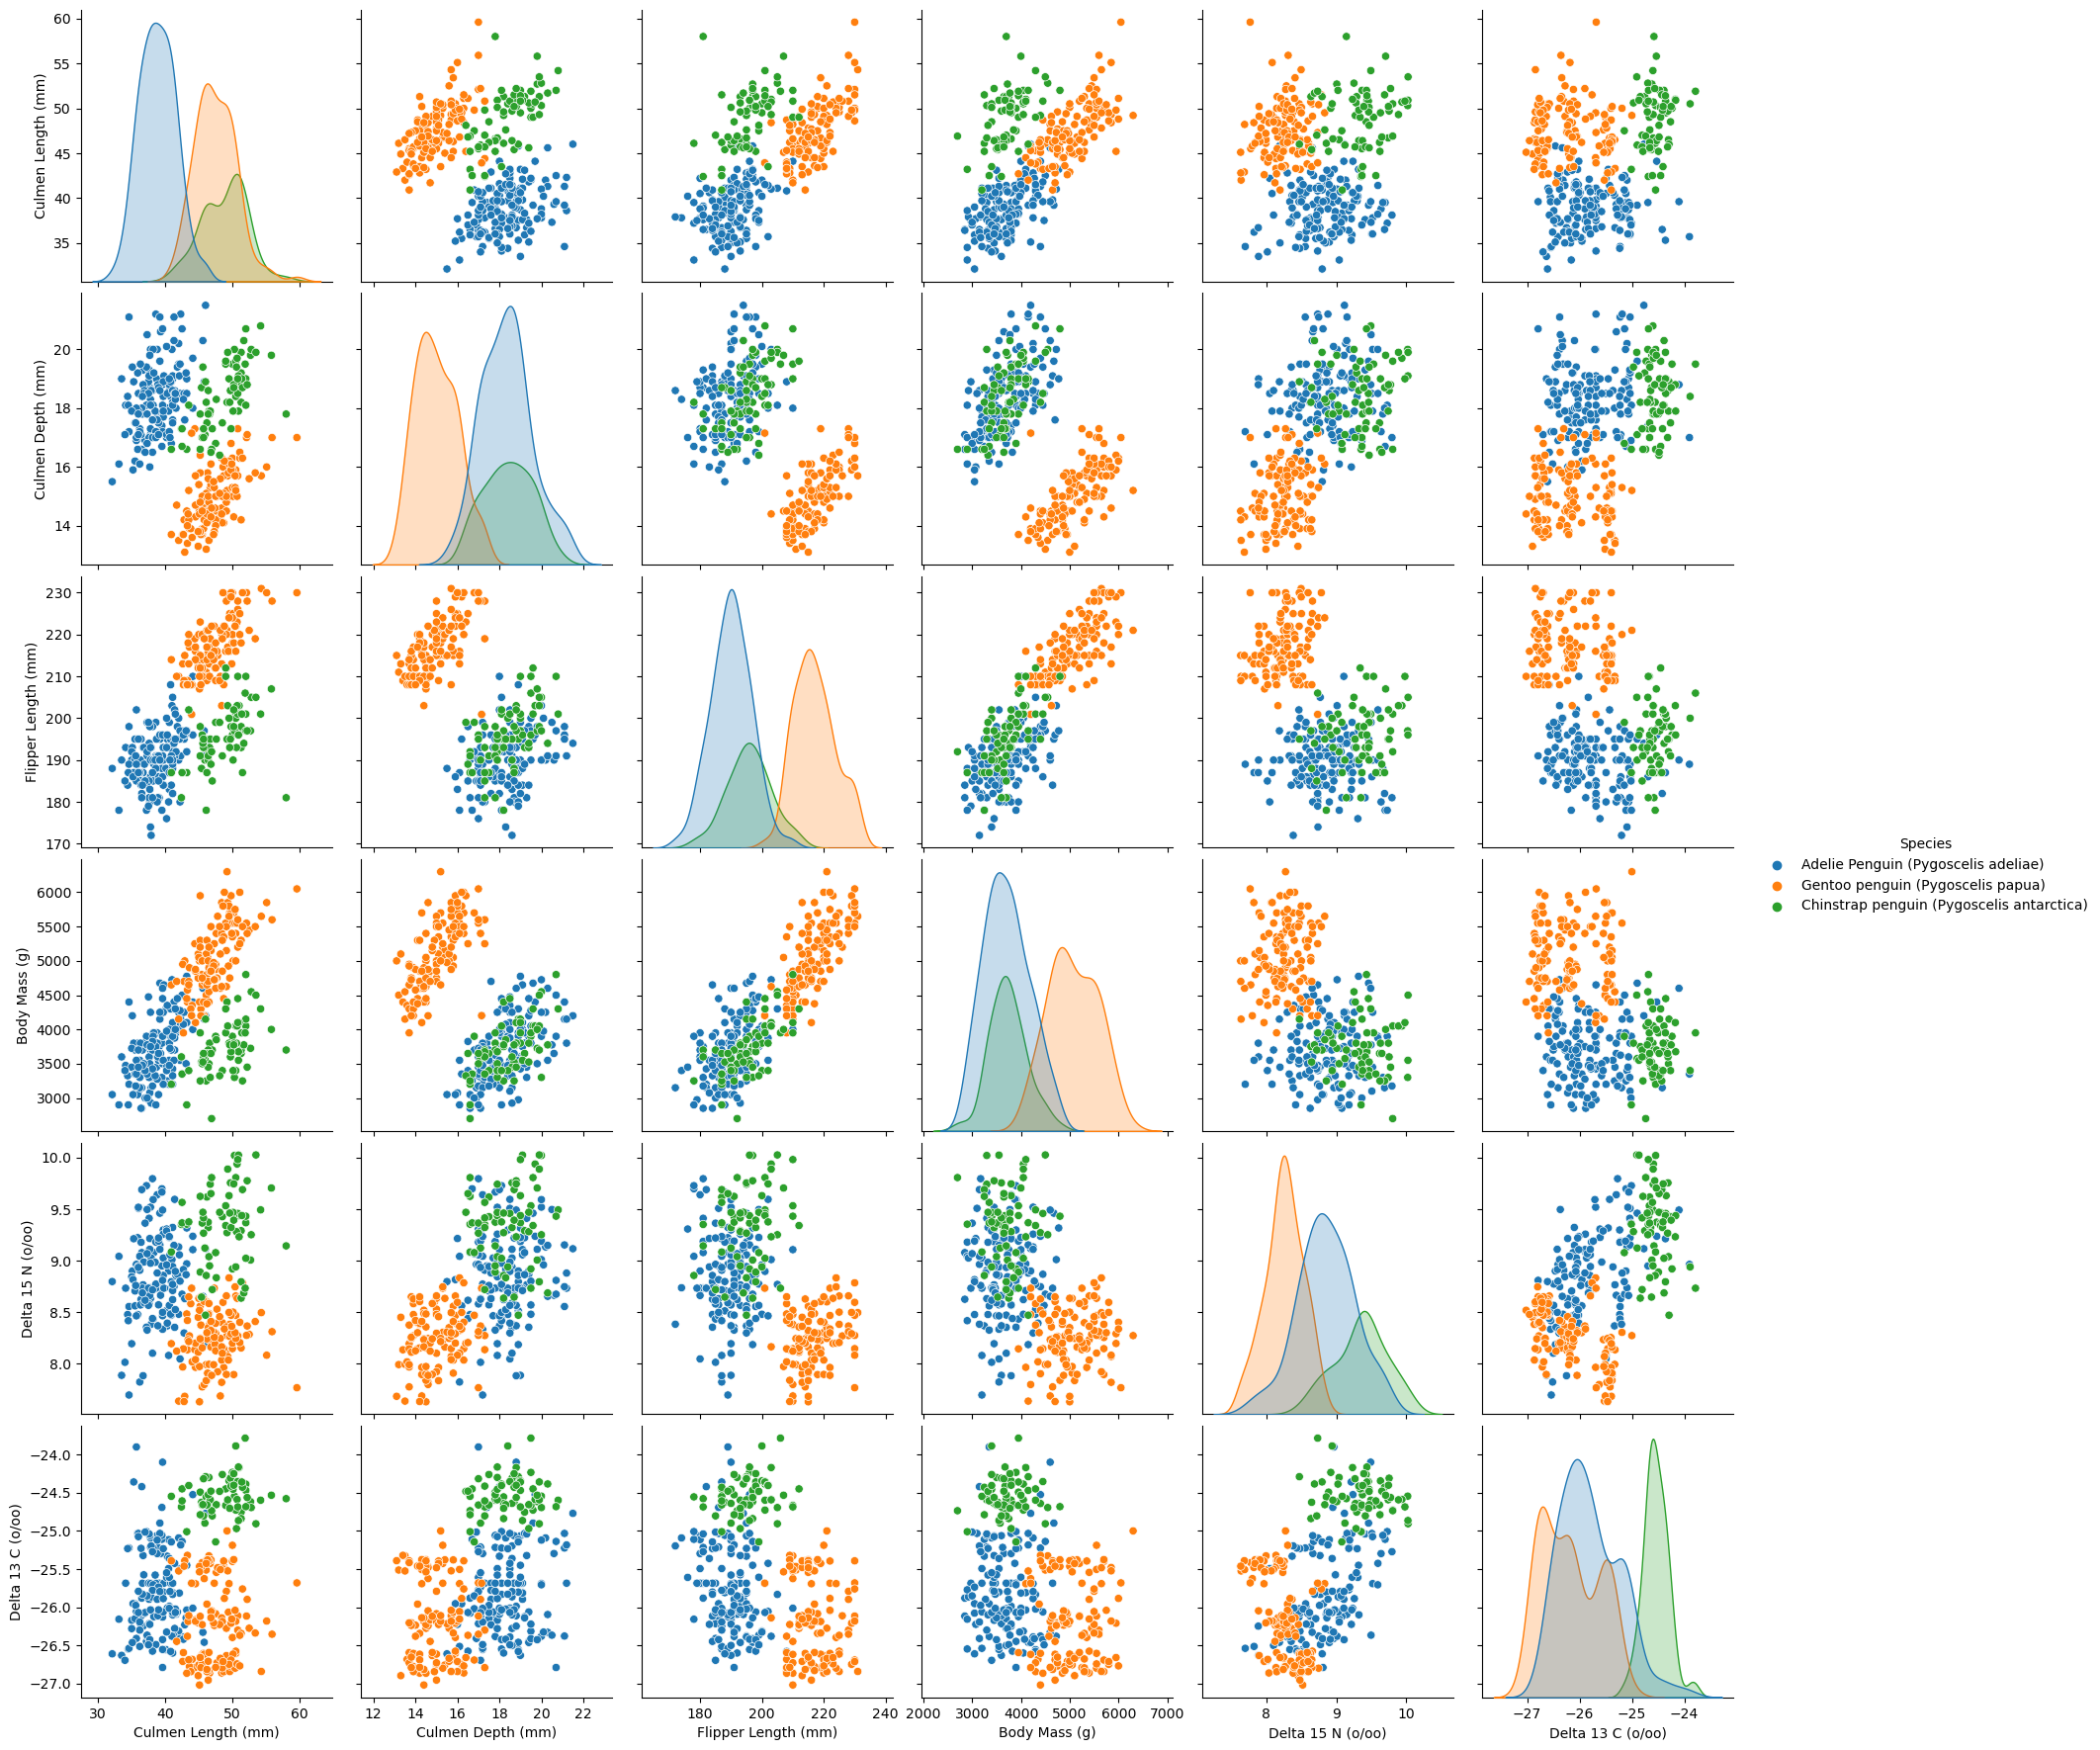

In [67]:
#handle the error message from seaborn
#import warnings
#warnings.filterwarnings("ignore", message="Found unknown categories in columns")
sns.pairplot(df, hue="Species", height=3,diag_kind="kde",);

In [118]:
#conclusions from the pair plot
species_count = df['Species'].value_counts()
species_count/344*100

Species
Adelie Penguin (Pygoscelis adeliae)          44.186047
Gentoo penguin (Pygoscelis papua)            36.046512
Chinstrap penguin (Pygoscelis antarctica)    19.767442
Name: count, dtype: float64

## xtics of each species
### our data set contains 344 samples. collected from the region of Anvers from 3 Islands(['Torgersen', 'Biscoe', 'Dream'])
the dataset contained 3 samples(Adelie Penguin (44%),Gentoo penguin (36%),Chinstrap penguin (20%)

1. Gentoo penguin(moderate/high culmen length,low culmen depth,high flipper length, higher body mass, lower delta15N,lower delta 13N)
2. Adelie Penguin(low culmen length,moderate/high culmen depth,low flipper length, low body mass, moderate delta15N,moderate delta 13N)
3. Chinstrap penguin(moderate culmen length,moderate/high culmen depth,low flipper length, low body mass, moderatehigh delta15N,high delta 13N)
### important features
-culmen depth is important in the separation of gentoo
-culmen length for separating Adelie and Chinstrap(with adelie having the lowest)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

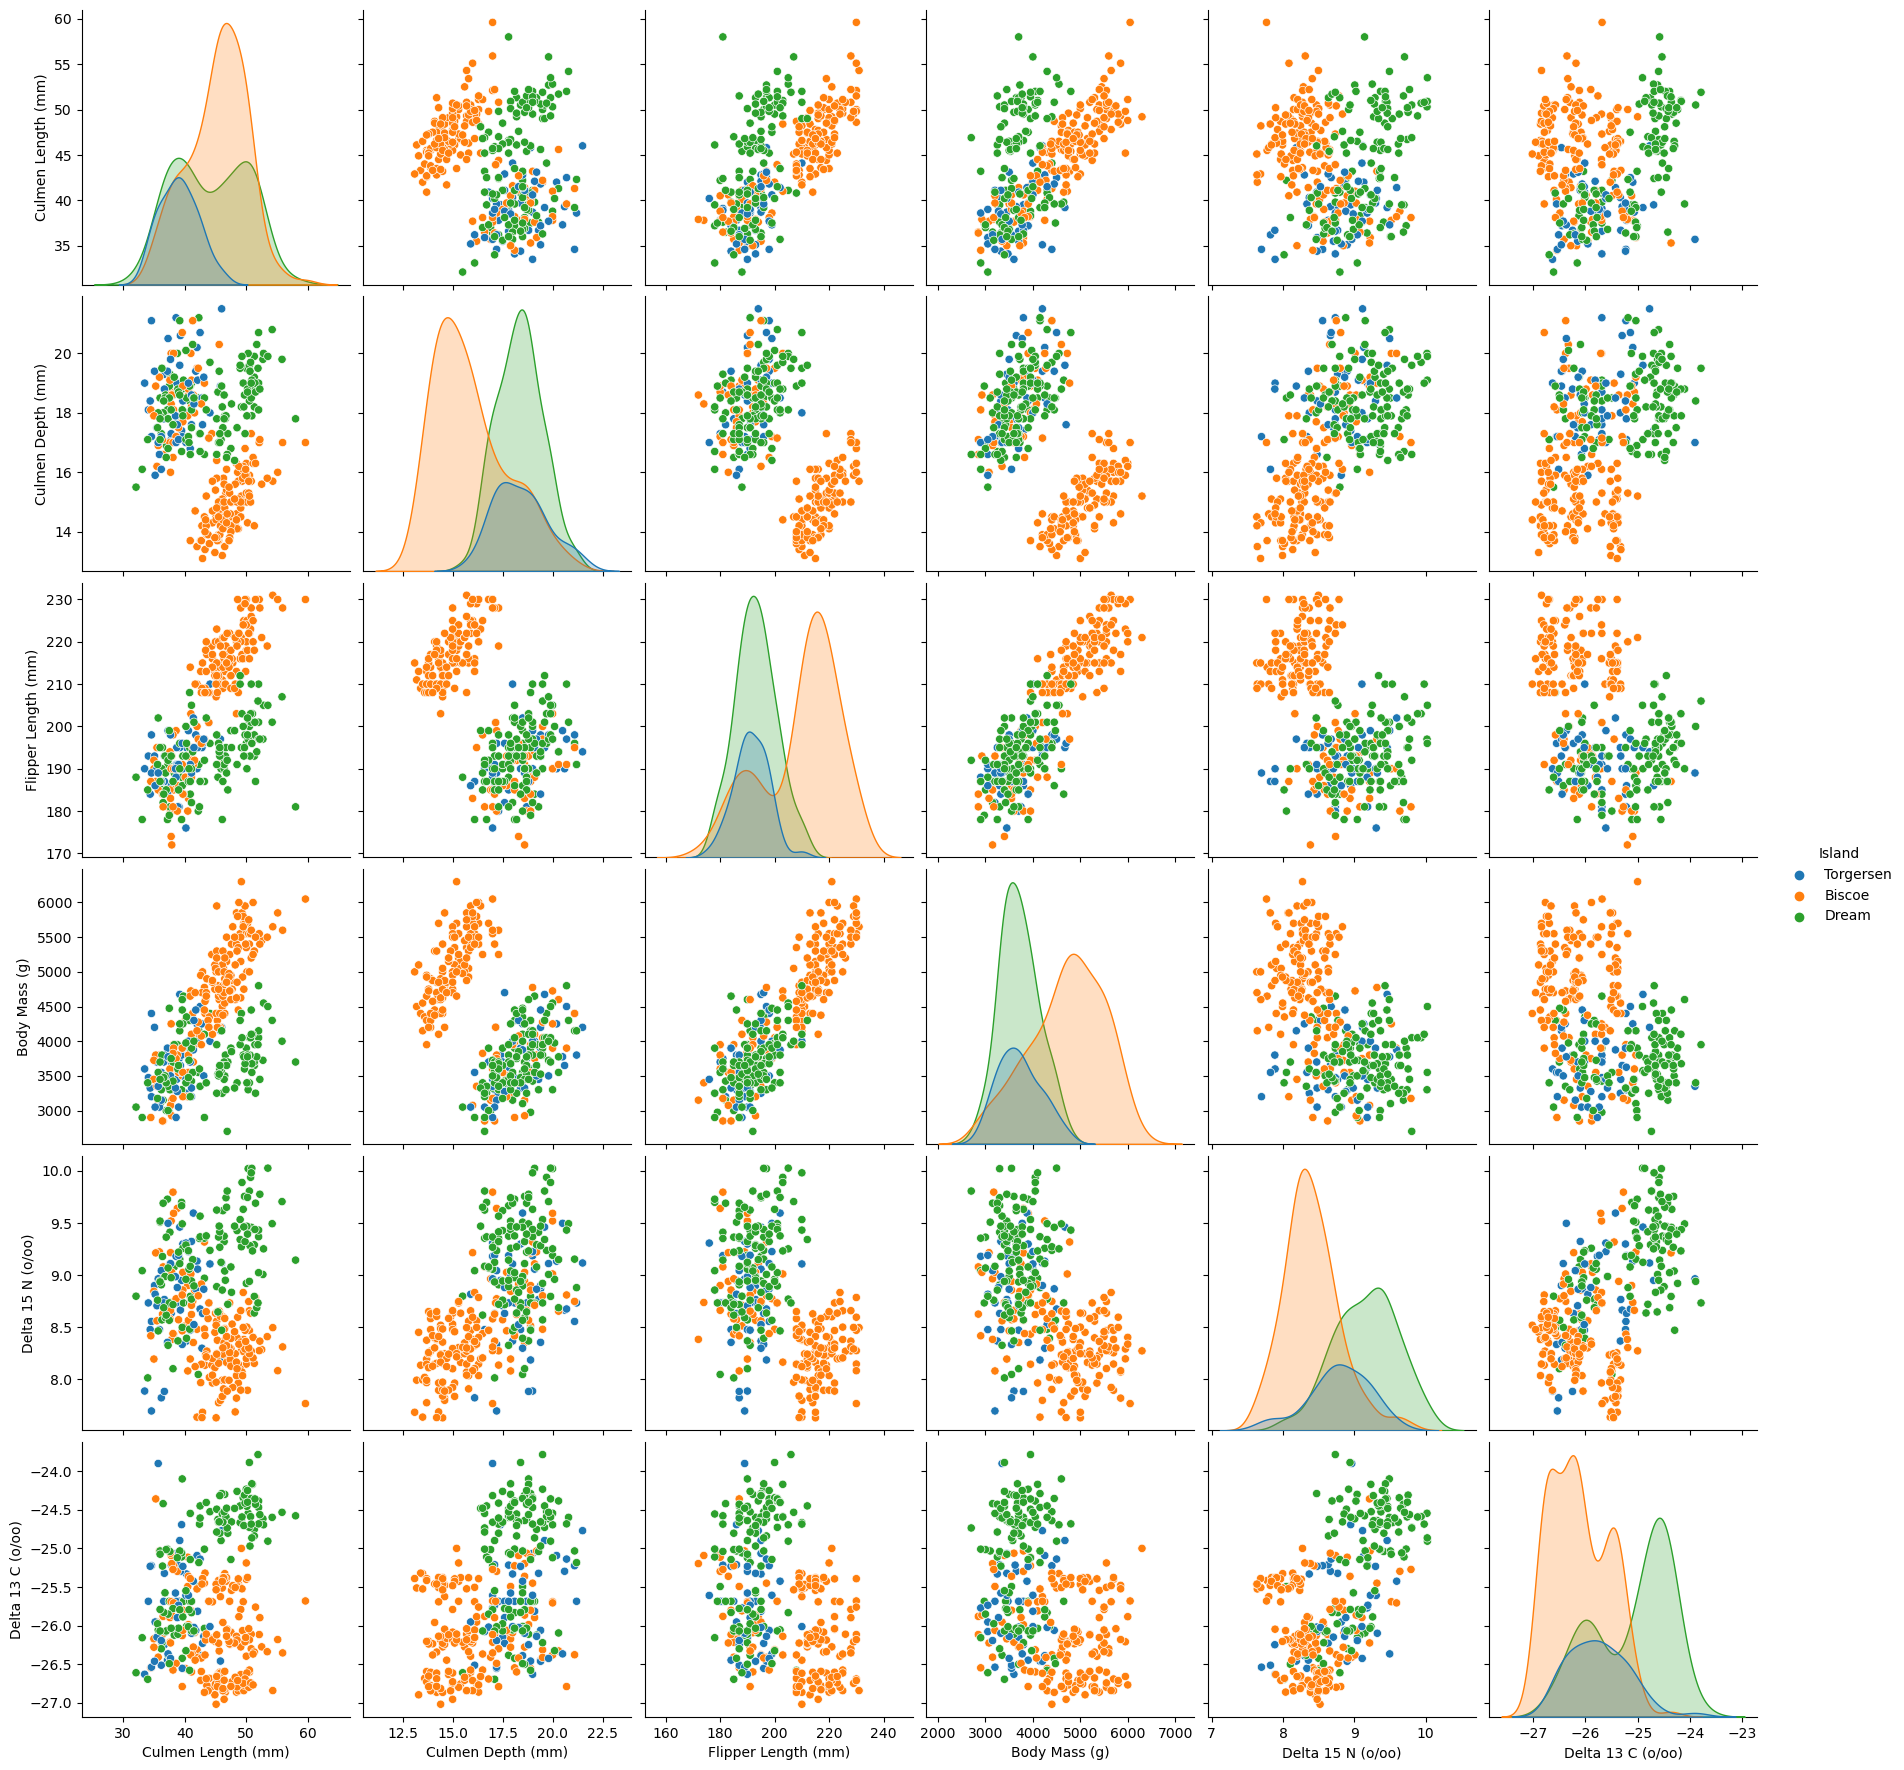

In [85]:
sns.pairplot(df, hue="Island", height=3,diag_kind="kde",);

###  we could say that males are generally bigger than females, but we have more males than females in the dataset

In [103]:
male_penguins = df[df['Sex']== 'MALE']
print('average body mass for male:', male_penguins['Body Mass (g)'].mean())
female_penguins = df[df['Sex']== 'FEMALE']
print('average body mass for females:', female_penguins['Body Mass (g)'].mean())

average body mass for male: 4514.684406547094
average body mass for females: 3862.2727272727275


In [137]:
numerical_df.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.235053,0.656181,0.595110,-0.058562,0.185820
Culmen Depth (mm),-0.235053,1.000000,-0.583851,-0.471916,0.596275,0.424059
Flipper Length (mm),0.656181,-0.583851,1.000000,0.871202,-0.495253,-0.366999
Body Mass (g),0.595110,-0.471916,0.871202,1.000000,-0.530444,-0.369514
Delta 15 N (o/oo),-0.058562,0.596275,-0.495253,-0.530444,1.000000,0.565634
Delta 13 C (o/oo),0.185820,0.424059,-0.366999,-0.369514,0.565634,1.000000
